In [1]:
import sys
import os
sys.path.insert(0, os.environ['VIRTUAL_ENV']+'/ghtesting')

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from ghdatabase import GHDatabase
from ghrepo import GHRepo

db = GHDatabase('github', 'webframework_repos')

num_repos = len(list(db.get_repos()))
print(f'Number of repos: {db.repos_count()}')

df = pd.DataFrame()
for repojson in db.get_repos():
    repo = GHRepo(repojson)
#     print(repo.url)
#     print(repo.badges[0])
    new_row = dict()
    new_row['name'] = repo.name
    for b in repo.badges[0]:
        new_row[b] = True
    df = df.append(new_row, ignore_index=True)
df = df.fillna(False).replace(1.0, True)
df


Number of repos: 7644


,name,github,travisci,saucelabs,circleci,azure_pipelines,appveyorci,semaphoreci,gitlab,buildkite,codeship,wercker,shippable,teamcity,bitrise
0,ajenti/ajenti,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,icescrum/iceScrum,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,handsontable/handsontable,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,acidb/mobiscroll,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,sectore/CafeTownsend-Angular-Rails,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,ggymm/data-view-web,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7640,lo4396ve/vue-analysis,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7641,oceanengine/okeedesign-mobile-vue,True,False,False,False,False,False,False,False,False,False,False,False,False,False
7642,liyupi/father,False,False,False,False,False,False,False,False,False,False,False,False,False,False


[Text(0, 0, '4810'),
 Text(0, 0, '2721'),
 Text(0, 0, '103'),
 Text(0, 0, '8'),
 Text(0, 0, '2')]

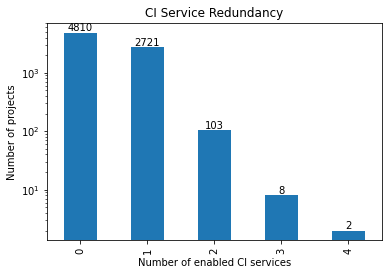

In [3]:
repo_cis_series = df[df.columns[1:]].sum(axis=1).sort_values(ascending=False).value_counts().astype(int)
#repo_cis_series
ci_redun_plot = repo_cis_series.plot.bar(title='CI Service Redundancy'
                        , ylabel='Number of projects'
#                         , figsize=(3,3)
                        , xlabel='Number of enabled CI services'
                        , logy=True)
ci_redun_plot.bar_label(ci_redun_plot.containers[0])

<AxesSubplot:title={'center':'CI Service Usage'}>

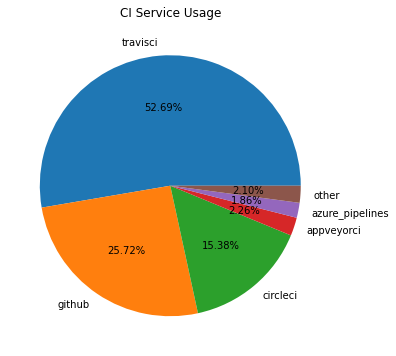

In [4]:
ci_series = df[df.columns[1:]].sum().sort_values(ascending=False)
ci_series['other'] = 0
for idx, val in ci_series.items():
    if idx == 'other':
        continue
    if val < 50:
        ci_series['other'] = ci_series['other'] + val
        ci_series.drop(idx, inplace=True)
ci_series.plot.pie(title='CI Service Usage'
               , ylabel=''
               , figsize=(6,6)
               , legend=False
               , autopct='%1.2f%%')


In [5]:
langs_df = pd.DataFrame()
for repojson in db.get_repos():
    repo = GHRepo(repojson)
#     print(repo.url)
#     print(repo.badges[0])
    new_row = dict()
    new_row['name'] = repo.name
    l = repo.primarylanguage
    new_row[l] = True
    langs_df = langs_df.append(new_row, ignore_index=True)
langs_df = langs_df.fillna(False).replace(1.0, True)
langs_df

,name,Python,Groovy,JavaScript,Ruby,Java,Scala,TypeScript,n/a,PHP,...,Objective-C++,Blade,Batchfile,Julia,Jupyter Notebook,R,GLSL,Svelte,TSQL,Liquid
0,ajenti/ajenti,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,icescrum/iceScrum,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,handsontable/handsontable,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,acidb/mobiscroll,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,sectore/CafeTownsend-Angular-Rails,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,ggymm/data-view-web,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7640,lo4396ve/vue-analysis,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7641,oceanengine/okeedesign-mobile-vue,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7642,liyupi/father,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


[Text(0, 0, '3636'),
 Text(0, 0, '2132'),
 Text(0, 0, '788'),
 Text(0, 0, '235'),
 Text(0, 0, '149'),
 Text(0, 0, '100'),
 Text(0, 0, '99'),
 Text(0, 0, '92'),
 Text(0, 0, '77'),
 Text(0, 0, '336')]

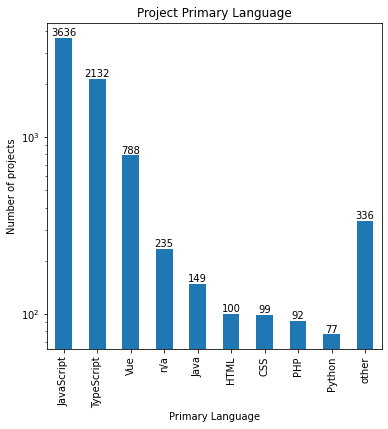

In [6]:
lang_series = langs_df[langs_df.columns[1:]].sum().sort_values(ascending=False)
lang_series['other'] = 0
for idx, val in lang_series.items():
    if idx == 'other':
        continue
    if val < 75:
        lang_series['other'] = lang_series['other'] + val
        lang_series.drop(idx, inplace=True)

lang_plot = lang_series.plot.bar(title='Project Primary Language'
               , ylabel='Number of projects'
               , xlabel='Primary Language'
               , figsize=(6,6)
               , logy=True
               , legend=False)
lang_plot.bar_label(lang_plot.containers[0])

In [7]:
topics_df = pd.DataFrame()
for repojson in db.get_repos():
    repo = GHRepo(repojson)
#     print(repo.url)
#     print(repo.badges[0])
    new_row = dict()
    new_row['name'] = repo.name
    webtopics = ['angular', 'react', 'vue']
    for t in webtopics:
        if t in repo.topics:
            new_row[t] = True
    topics_df = topics_df.append(new_row, ignore_index=True)
topics_df = topics_df.fillna(False).replace(1.0, True)
topics_df

,name,angular,react,vue
0,ajenti/ajenti,True,False,False
1,icescrum/iceScrum,True,False,False
2,handsontable/handsontable,True,True,True
3,acidb/mobiscroll,True,True,False
4,sectore/CafeTownsend-Angular-Rails,True,False,False
...,...,...,...,...
7639,ggymm/data-view-web,False,False,True
7640,lo4396ve/vue-analysis,False,False,True
7641,oceanengine/okeedesign-mobile-vue,False,False,True
7642,liyupi/father,False,False,True


In [8]:
from matplotlib_venn import venn3
webtopics = ['angular', 'react', 'vue']

t_df=topics_df.drop('name', axis=1).groupby(webtopics, as_index=False).size()
t_df

,angular,react,vue,size
0,False,False,True,2122
1,False,True,False,4344
2,False,True,True,148
3,True,False,False,873
4,True,False,True,8
5,True,True,False,58
6,True,True,True,91


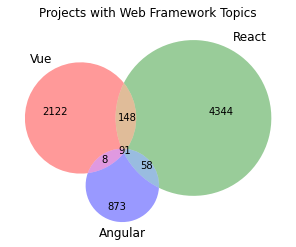

In [9]:
# https://towardsdatascience.com/professional-venn-diagrams-in-python-638abfff39cc
# https://pypi.org/project/matplotlib-venn/
sets = tuple(t_df['size'])

# print(sets)
plt.title('Projects with Web Framework Topics')
venn3(subsets = sets
      , set_labels = ('Vue', 'React', 'Angular'))